<a href="https://colab.research.google.com/github/melisa9999/Python-Programming-and-Numerical-Methods-A-Guide-for-Engineers-and-Scientists--SOLUTIONS/blob/main/22.%20Ordinary%20Differential%20Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

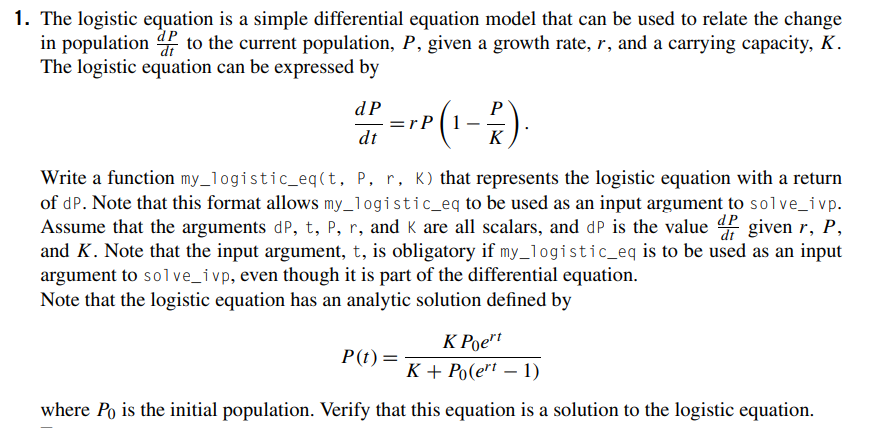

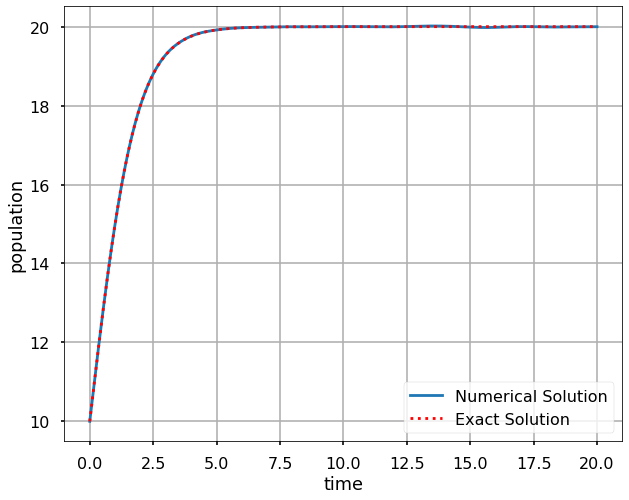

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import partial

plt.style.use("seaborn-poster")
""" A condinuación se define una función que describe al 
ecuación diferencial primero para definir la F(t_j,S(t_j))"""


def my_logistic_eq(t, P, r, K):

    dP = r * P * (1 - P / K)
    return dP


dP = my_logistic_eq(0, 10, 1.1, 15)
dP

"""Para usar la función solve_ivp() es necesario tener:
    1. Intervalo 
    2. Función F(t,S(t))
    3. S0
"""
t0 = 0
tf = 20
P0 = 10
r = 1.1
K = 20
t = np.linspace(0, 20, 2001)

f = partial(my_logistic_eq, r=r, K=K)
sol = solve_ivp(f, [t0, tf], [P0],
                t_eval=t)  # note que la 2da y 3ra entrada son arreglos
plt.figure(figsize=(10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(t,
         K * P0 * np.exp(r * t) / (K + P0 * (np.exp(r * t) - 1)),
         "r:")  # solución dada en el doc
plt.xlabel("time")
plt.ylabel("population")
plt.legend(["Numerical Solution", "Exact Solution"])
plt.grid(True)
plt.show()


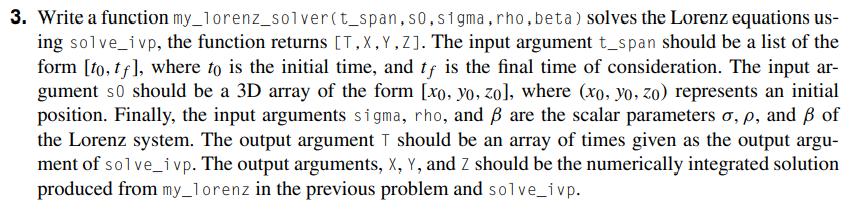

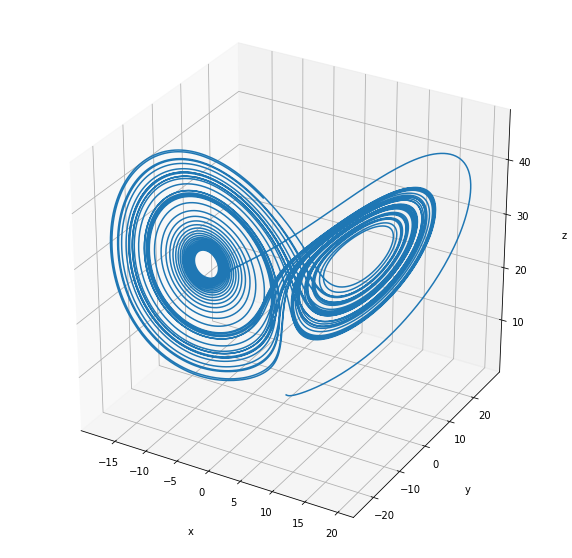

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def my_lorenz(t, S, sigma, beta, rho):
    x, y, z = S
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    dS = [dx, dy, dz]
    return dS


s = np.array([1, 2, 3])
dS = my_lorenz(0, s, 10, 28, 8 / 3)


def my_lorenz_solver(t_span, s0, sigma, rho, beta):

    from functools import partial

    t0 = t_span[0]
    tf = t_span[1]

    t = np.linspace(t0, tf, 20001)
    f = partial(my_lorenz, sigma=sigma, rho=rho, beta=beta)

    sol = solve_ivp(f, t_span, s0, t_eval=t)

    T, X, Y, Z = sol.t, sol.y[0, :], sol.y[1, :], sol.y[2, :]
    return [T, X, Y, Z]


sigma = 10
rho = 28
beta = 8 / 3
t0 = 0
tf = 50
s0 = np.array([0, 1, 1.05])


[T, X, Y, Z] = my_lorenz_solver([t0, tf], s0, sigma, rho, beta)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.grid()
ax.plot3D(X, Y, Z)
# Set axes label
ax.set_xlabel("x", labelpad=20)
ax.set_ylabel("y", labelpad=20)
ax.set_zlabel("z", labelpad=20)
plt.show()


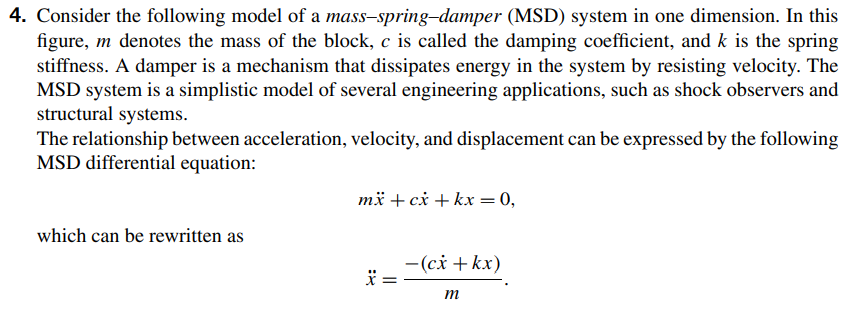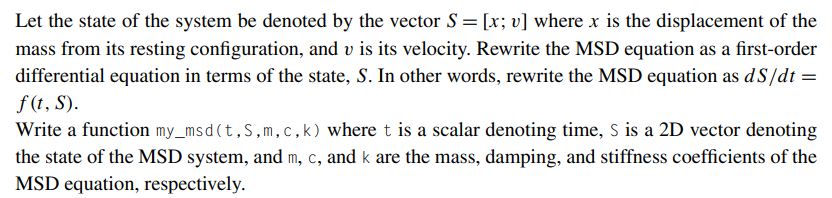

[-1.  -9.9]


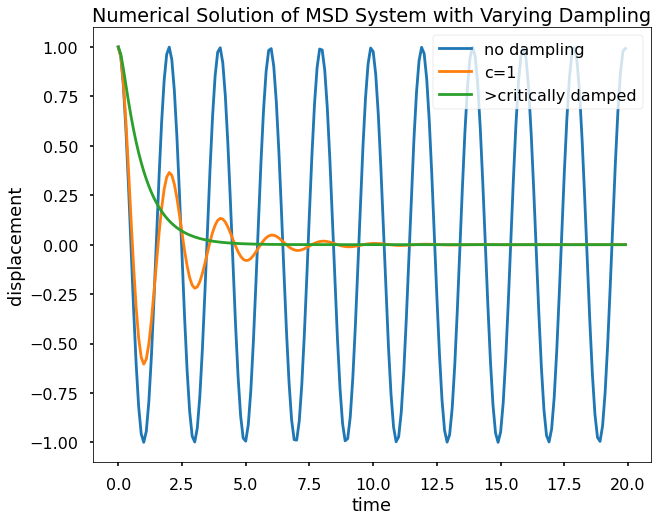

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import partial


def my_msd(t, S, m, c, k):

    dS = np.dot(np.array([[0, 1], [-k / m, -c / m]]), S)

    return dS


dS = my_msd(0, [1, -1], 10, 1, 100)

print(dS)

m = 1
k = 10
f = partial(my_msd, m=m, c=0, k=k)
t_e = np.arange(0, 20, 0.1)
sol_1 = solve_ivp(f, [0, 20], [1, 0], t_eval=t_e)
f = partial(my_msd, m=m, c=1, k=k)
sol_2 = solve_ivp(f, [0, 20], [1, 0], t_eval=t_e)
f = partial(my_msd, m=m, c=10, k=k)
sol_3 = solve_ivp(f, [0, 20], [1, 0], t_eval=t_e)
plt.figure(figsize=(10, 8))
plt.plot(sol_1.t, sol_1.y[0])
plt.plot(sol_2.t, sol_2.y[0])
plt.plot(sol_3.t, sol_3.y[0])
plt.title("Numerical Solution of MSD System with Varying Dampling")
plt.xlabel("time")
plt.ylabel("displacement")
plt.legend(["no dampling", "c=1", ">critically damped"], loc=1)
plt.show()
